In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [129]:
data=pd.read_csv('ML_assignment_dataset - Sheet1.csv')

In [130]:
data.head()

,Python,Sql,ML,Tableau,Excel,Student Placed
0,0.80,0.57,0.63,0.50,0.34,Yes
1,0.81,0.90,0.62,0.71,0.92,No
2,0.49,0.69,0.62,0.64,0.41,No
3,0.40,0.94,0.60,0.26,0.47,No
4,0.31,0.87,1.00,0.23,0.99,No


In [131]:
data.columns=[x.replace(" ","_") for x in data.columns]
df=data.copy()


In [132]:
df['Student_Placed'].unique()

array(['Yes', 'No'], dtype=object)

In [133]:
from sklearn.preprocessing import LabelEncoder

In [134]:
le=LabelEncoder()
le

LabelEncoder()

In [135]:
df.Student_Placed=le.fit_transform(df.Student_Placed)

In [136]:
df.head()

,Python,Sql,ML,Tableau,Excel,Student_Placed
0,0.80,0.57,0.63,0.50,0.34,1
1,0.81,0.90,0.62,0.71,0.92,0
2,0.49,0.69,0.62,0.64,0.41,0
3,0.40,0.94,0.60,0.26,0.47,0
4,0.31,0.87,1.00,0.23,0.99,0


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()

In [139]:
scaler.fit(df.drop('Student_Placed',axis=1))

StandardScaler()

In [140]:
scaled_features = scaler.transform(df.drop('Student_Placed',axis=1))

In [141]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Python,Sql,ML,Tableau,Excel
0,0.937426,0.255720,0.406507,0.016625,-0.480283
1,0.970215,1.393784,0.371357,0.736466,1.583918
2,-0.079021,0.669561,0.371357,0.496519,-0.231155
3,-0.374118,1.531731,0.301058,-0.806051,-0.017617
4,-0.669216,1.290324,1.707048,-0.908885,1.833046


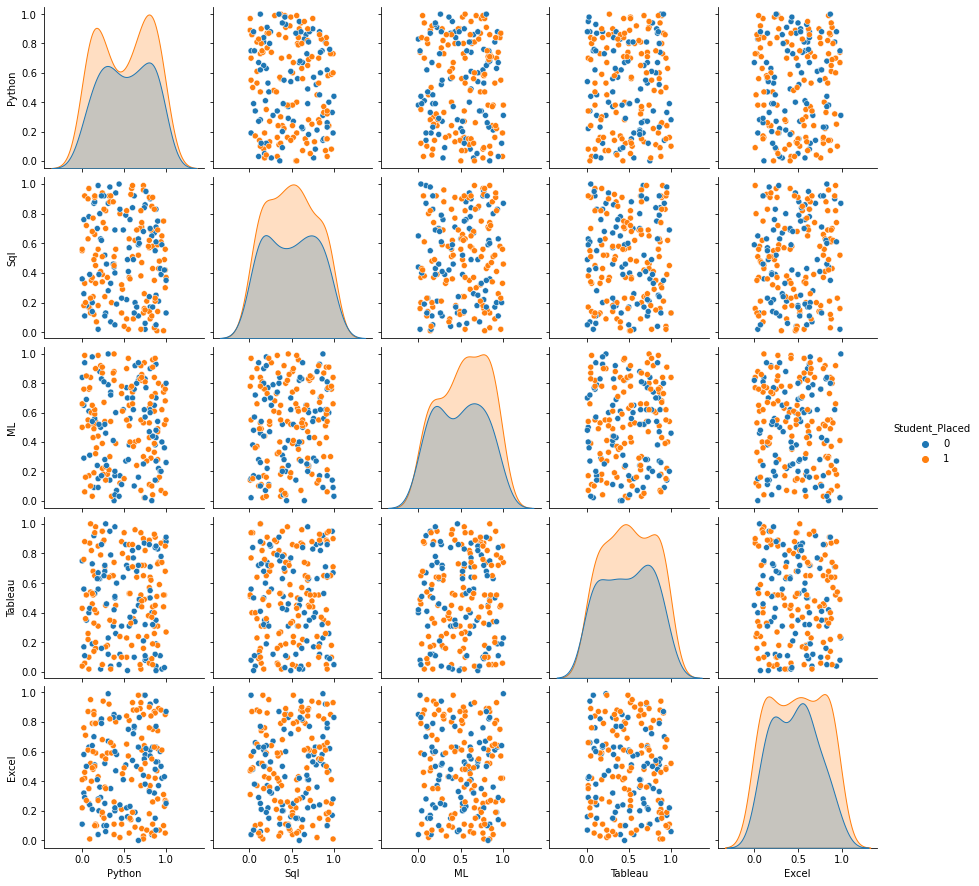

In [142]:
import seaborn as sns

sns.pairplot(df,hue='Student_Placed')

## Train Test Split

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Student_Placed'],test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [145]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
knn = KNeighborsClassifier(n_neighbors=1)

In [147]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [148]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [149]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [150]:
print(confusion_matrix(y_test,pred))

[[12 12]
 [25 11]]


In [151]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.32      0.50      0.39        24
           1       0.48      0.31      0.37        36

    accuracy                           0.38        60
   macro avg       0.40      0.40      0.38        60
weighted avg       0.42      0.38      0.38        60



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [152]:
accuracy_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Student_Placed'],cv=10)    #crossvalidation  
    accuracy_rate.append(score.mean())

In [153]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Student_Placed'],cv=10)
    error_rate.append(1-score.mean())

In [154]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

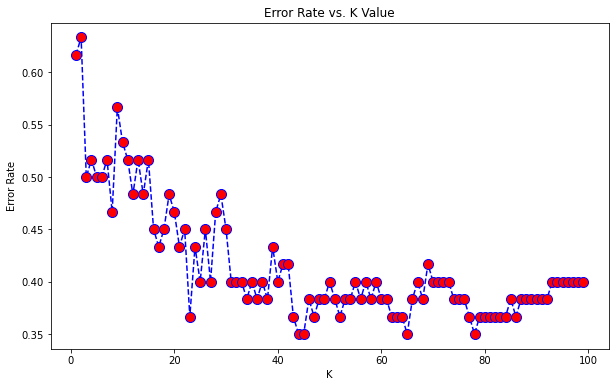

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>70 the error rate just tends to hover around 0.2-0.4 Let's retrain the model with that and check the classification report!

Text(0, 0.5, 'accuracy_rate')

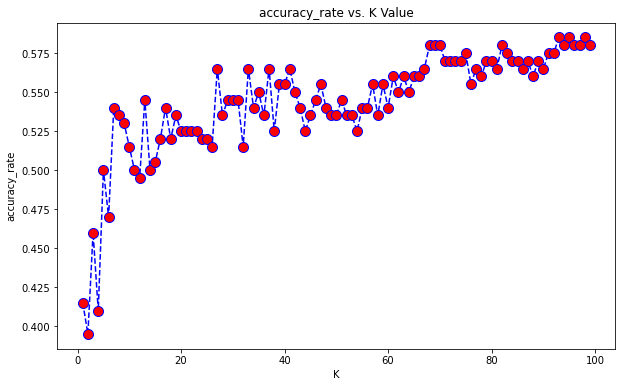

In [156]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
        #markerfacecolor='red', markersize=10)
plt.plot(range(1,100),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

In [157]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[12 12]
 [25 11]]


              precision    recall  f1-score   support

           0       0.32      0.50      0.39        24
           1       0.48      0.31      0.37        36

    accuracy                           0.38        60
   macro avg       0.40      0.40      0.38        60
weighted avg       0.42      0.38      0.38        60



In [158]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=70)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=70')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=70


[[ 2 22]
 [ 2 34]]


              precision    recall  f1-score   support

           0       0.50      0.08      0.14        24
           1       0.61      0.94      0.74        36

    accuracy                           0.60        60
   macro avg       0.55      0.51      0.44        60
weighted avg       0.56      0.60      0.50        60



In [159]:
tknn = KNeighborsClassifier(n_neighbors=1)

In [160]:
tknn.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=1)

In [168]:
train_error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Student_Placed'],cv=10)
    train_error_rate .append(1-score.mean())

In [169]:
test_error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(tknn,df_feat,df['Student_Placed'],cv=10)
    test_error_rate.append(1-score.mean())

In [170]:
test_error_rate

[0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585,
 0.585]

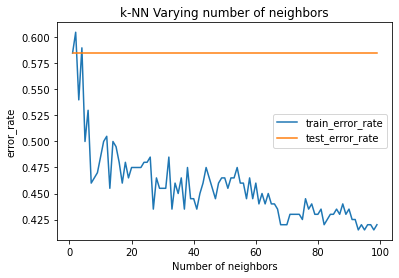

In [172]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,100), train_error_rate, label='train_error_rate')
plt.plot(range(1,100), test_error_rate, label='test_error_rate')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('error_rate')
plt.show()